<center><H1>Generating Molecular Fingerprints</H1></center>

<div class="alert alert-block alert-info">
<Strong>Objectives</strong>

- Generate structural keys
- Generate hashed fingerprints


Many useful documents/papers describe various aspects of molecular similarity, including molecular fingerprints and similarity measures.  Please read these if you need more details.

- Getting Started with the RDKit in Python<br>
(https://www.rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity)

- Fingerprint Generation, GraphSim Toolkit 2.4.2<br>
(https://docs.eyesopen.com/toolkits/python/graphsimtk/fingerprint.html)

- Chemical Fingerprints<br>
(https://docs.chemaxon.com/display/docs/Chemical+Fingerprints)

- Extended-Connectivity Fingerprints<br>
(https://doi.org/10.1021/ci100050t)



## Fingerprint Generation

Molecular fingerprints are molecular descriptors that encode a molecule's structure as a bit string. Each bit in the string indicates the presence or absence of a structural feature. This notebook explores generation of two major types of molecular fingerprints:
1) structural keys
2) hashed fingerprints

In [1]:
from rdkit import Chem

In [2]:
mol = Chem.MolFromSmiles('CC(C)C1=C(C(=C(N1CC[C@H](C[C@H](CC(=O)O)O)O)C2=CC=C(C=C2)F)C3=CC=CC=C3)C(=O)NC4=CC=CC=C4')# atorvastatin

<div class="alert alert-block alert-success">
<H3>Structural Keys</H3> 

### 1: MACCS keys
The MACCS key is a binary fingerprint (a string of 0's and 1's) with a total length of 166 bits.  Each bit position represents the presence (=1) or absence (=0) of a pre-defined structural feature.  The feature definitions for the MACCS keys are available at:<br> https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py

In [11]:
from rdkit.Chem import MACCSkeys  #import library for generating MACCSkeys from rdkit
fp = MACCSkeys.GenMACCSKeys(mol)  # create an object called fp. It is an instance of the MACCSkeys fingerprint 

In [14]:
print('fp is of type:',(type(fp)))
print()
#this code prints out each value of the bits in the fingerprint ojbect
#it loops through each bit and print
print('printing the values of the bitstring as a loop:')
for i in range(len(fp)):
    print(fp[i], end='')
print()
# Alternative, easier way to convert it to a bitstring for output.
print('printing the values of the bitstring as ToBitString method in rdkit')
fp.ToBitString()    


fp is of type: <class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>

printing the values of the bitstring as a loop:
00000000000000000000000000000000000000000010000000000100000000100100000000110000100101010111100011001000100110110000011001110100110111111101101011111111111111111111110
printing the values of the bitstring as ToBitString method in rdkit


'00000000000000000000000000000000000000000010000000000100000000100100000000110000100101010111100011001000100110110000011001110100110111111101101011111111111111111111110'

In [17]:
print(len(fp))          #one way to get the number of bits in the fingerprint
print(fp.GetNumBits())  # another way to get the number of bits in the fingerprint

167
167


Note that the MACCS key is **166-bit-long**, but RDKit generates a 167-bit-long fingerprint.  It is because the index of a list/vector in many programming languages (including python) begins at 0.  To use the original numbering of the MACCS keys (1-166) (rather than 0-165), the MACCS keys were implemented to be 167-bit-long, with Bit 0 being always zero. Because Bit 0 is set to OFF for all compounds, it does not affect the evaluation of molecular similarity.

These are some methods that allow you to get some additional information on the MACCS Keys.

In [19]:
print(fp.GetNumBits())      #get total number of bits
print(fp.GetNumOffBits())   #get the total number bits with value 0
print(fp.GetNumOnBits())    #get the total number bits with value 1
print(fp.ToBinary())        #reports the binary representation of the fingerprint

167
105
62
b'\xe0\xff\xff\xff\xa7\x00\x00\x00>\x00\x00\x00T\x14\x10\x04\x10\x00\x08\x04\x02\x02\x02\x00\x00\x00\x06\x00\x04\x06\x04\x00\x02\x00\n\x00\x04\x00\x00\x02\x04\x00\x02\x00\x00\x00\x00\x00\x00\x02\x00\x02\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02'


**Run the following code cells.**
1) The first cell contains SMILES for a series of molecules and displays their structures
2) The second cell displays the MACCS keys for each molecule in the list called smiles.

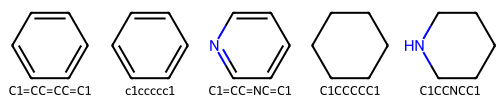

In [28]:
# display a series of smiles
smiles = [ 'C1=CC=CC=C1', # Benzene (Kekule)
           'c1ccccc1',    # Benzene ("Aromatized" carbons)
          'C1=CC=NC=C1', # pyridine   
           'C1CCCCC1',    # Cyclohexene
            'C1CCNCC1']   # piperidine    

from rdkit.Chem import Draw
mols = []
for x in smiles:
    mols.append(Chem.MolFromSmiles(x))

#mols = [ Chem.MolFromSmiles(x) for x in smiles ]
Chem.Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(100,100), legends=[str(x) for x in smiles] )

In [29]:
# generate MACCSKeys from smiles
for smile in smiles:
    print(smile)
    mol = Chem.MolFromSmiles(smile)
    fp = MACCSkeys.GenMACCSKeys(mol)
    fp = fp.ToBitString()
    print(fp)
    for index, val in enumerate(fp):
        if val == '1':
            print("index is %d and value is %s" %(index, val))
    print()

C1=CC=CC=C1
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011010
index is 162 and value is 1
index is 163 and value is 1
index is 165 and value is 1

c1ccccc1
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011010
index is 162 and value is 1
index is 163 and value is 1
index is 165 and value is 1

C1=CC=NC=C1
00000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000100000000000000000000001000000000000000100000000000000000000000111010
index is 65 and value is 1
index is 98 and value is 1
index is 121 and value is 1
index is 137 and value is 1
index is 161 and value is 1
index is 162 and value is 1
index is 163 and value is 1
index is 165 and value is 1

C1CCCCC1
0000000000000000000000000000000000000000000000000000000000000

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>
    
In general what structural features do benzene and pyridine have in common? <br>
Which MACCS keys do they have in common?

<div class="alert alert-block alert-warning">
The feature definitions for the MACCS keys are available at: https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py <br>
<b>Write the fragment definition of the bits ON that are in common for benzene and pyridine</b> (one is already provided for you as an example).

<div class="alert alert-block alert-warning">
<b>Why is index 165 'on' for all of the examples in the smiles list?</b>

### 2: PubChem Fingerprint

The PubChem Fingerprint is a 881-bit-long binary fingerprint (ftp://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf).  Similar to the MACCS keys, it uses a pre-defined fragment dictionary.  The PubChem fingerprint for each compound in PubChem can be downloaded from PubChem.  

In [7]:
# the following code cell generates a PUG REST request to obtain the PubChem Fingerprint
import requests
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
cid ="2244"  # CID for aspirin 
url = prolog + "/compound/cid/" + cid + "/property/Fingerprint2D/TXT"
res = requests.get(url)
pcfp_base64 = res.text  #pcfp = PubChemFingerPrint
print(pcfp_base64)

AAADccBwOAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGgAACAAADASAmAAyDoAABgCIAiDSCAACCAAkIAAIiAEGCMgMJzaENRqCe2Cl4BEIuYeIyCCOAAAAAAAIAAAAAAAAABAAAAAAAAAAAA==



Notice that the above output is not a binary bitstring. Pubchem Fingerprints are provided as Base64 encoded strings. The PubChem fingerprint is 881 bits representing structural features. Instead of storing these bits directly, PubChem encodes them as a new Base64 string. This provides for safer and easier transmittion through application programming interfaces (API) like PUG REST and databases can handle text better than the raw binary ones and zeros. When retrieved by the PUG REST API, the fingerprint appears as a 157 character string. Because they are base64-encoded, they should be decoded into binary bitstrings or bitvectors.

Details about how to decode base64-encoded PubChem fingerprints is described on the last page of the PubChem Fingerprint specification (https://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf).  Below is a user-defined function that decodes a PubChem fingerprint into a bit string.

In [8]:
from base64 import b64decode

def PCFP_BitString(pcfp_base64) :

    pcfp_bitstring = "".join( ["{:08b}".format(x) for x in b64decode( pcfp_base64 )] )[32:913]
    return pcfp_bitstring
    

Using the user defined function we created above, we can convert the base output to binary.

In [9]:
pcfp_bitstring = PCFP_BitString(pcfp_base64)  # use the user defined function to convert the PubChem FingerPrint to a bitstring
print(len(pcfp_bitstring))
print(pcfp_bitstring)

881
11000000011100000011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000001101000000000000000000000100000000000000000000000110000000100100000001001100000000000001100100000111010000000000000000000011000000000100010000000001000100000110100100000100000000000000000100000100000000000001001000010000000000000000010001000100000000001000001100000100011001000000011000010011100110110100001000011010100011010100000100111101101100000101001011110000000010001000010001011100110000111100010001100100000100000100011100000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000


The generated bitstring can be converted to a bitvector that can be used for molecular similarity computation in RDKit (to be discussed in part 2).

In [12]:
from rdkit import DataStructs
bitvect = DataStructs.CreateFromBitString(PCFP_BitString(pcfp_base64))
type(bitvect)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

<div class="alert alert-block alert-success">
<H3>Hashed Fingerprints</H3> 

### 1: Circular Fingerprints

MACCS Keys and PubChem Fingerprints are examples of structural keys which use a fixed length bit vector (166 and 881, respectively). Each bit in the vector corresponds to the presence (1) or absence (0) of a predefined chemical feature (atoms, bonds) or substructure ( aromatic rings, carbonyl). In contrast, extended connectivity fingerprints are generated algorithmically by exploring the neighborhood or each atom up to a given radius. The environment is then encoded into hashed identifiers. Structural keys rely on a fixed dictionary of features. Extnded connectivity fingerprints are more flexible and capture local atomic environments without the need for predefined substructures.

Circular fingerprints are hashed fingerprints.  They are generated by exhaustively enumerating "circular" fragments (containing all atoms within a given radius from each heavy atom of the molecule) and then hashing these fragments into a fixed-length bitstring.  (Here, the "radius" from an atom is measured by the number of bonds that separates two atoms).

Examples of circular fingerprints are the extended-connectivity fingerprint (ECFPs) and their variant called FCFPs (Functional-Class Fingerprints), originally described in a paper by Rogers and Hahn (https://doi.org/10.1021/ci100050t).  The RDKit implementation of these fingerprints are called "Morgan Fingerprints" (https://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints).

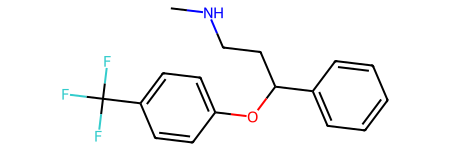

In [105]:
fluoxetine = Chem.MolFromSmiles('CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F')
fluoxetine

In [106]:
from rdkit.Chem import rdFingerprintGenerator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)
fp2 = mfpgen.GetFingerprint(fluoxetine)
bitstring= fp2.ToBitString()
print(bitstring)
print("The fingerprint length is",len(bitstring))

0100000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000010000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100100000000000000001000000000010000000000000000000000100000000000000000000100000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000

When comparing the RDK's Morgan fingerprints with the ECFP/FCFP fingerprints, it is important to remember that the name of ECFP/FCFP fingerprints are suffixed with the **diameter** of the atom environments considered, while the Morgan Fingerprints take a **radius** parameter (e.g., the second argument "2" of GetMorganFingerprintAsBitVect() in the above code cell).  The Morgan fingerprint generated above (with a radius of 2) is comparable to the ECFP4 fingerprint (with a diameter of 4).

MACCS Keys and PubChem Fingerprints are examples of structural keys which use a fixed length bit vector (166 and 881, respectively). Each bit in the vector corresponds to the presence (1) or absence (0) of a predefined chemical feature (atoms, bonds) or substructure ( aromatic rings, carbonyl). In contrast, extended connectivity fingerprints are generated algorithmically by exploring the neighborhood or each atom up to a given radius. The environment is then encoded into hashed identifiers. Structural keys rely on a fixed dictionary of features. Extnded connectivity fingerprints are more flexible and capture local atomic environments without the need for predefined substructures.


**To get a better idea of how these fingerprints are generated, over this next section you will explore 1-bromobutane and 1-chlorobutane**

In [122]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.drawOptions.addAtomIndices = True   #this will add numbers to the image to help identify carbons later
IPythonConsole.drawOptions.addStereoAnnotation = False

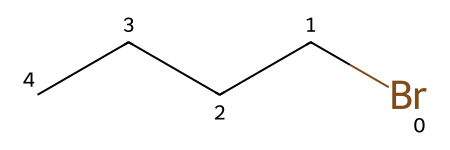

In [123]:
mol = Chem.MolFromSmiles("BrCCCC")  # 1-bromobutane
mol

Let's generate its rdkit Morgan Fingerprint (radius = 2). This would be comparable to the ECFP4 fingerprint.

In [126]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

# Step 1: Create the molecule from SMILES
mol = Chem.MolFromSmiles('BrCCCC')  # 1-bromobutane
#mol = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1') #epinephrine

# Step 2: Initialize the Morgan fingerprint generator. We are setting the radius to 2 and total bit size to 1024
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)

# Step 3: Prepare the AdditionalOutput object to capture bit information
additional_output = rdFingerprintGenerator.AdditionalOutput()
additional_output.AllocateBitInfoMap()

# Step 4: Generate the fingerprint with additional output
fp1 = morgan_gen.GetFingerprint(mol, additionalOutput=additional_output)
print("The Morgan Fingerprint radius 2 fingerprint (ECPF4) for the molecule is:")
print(fp1.ToBitString())
print()

# Step 5: Retrieve and display the bit information

bit_info = additional_output.GetBitInfoMap()
for bit_id, atom_radius_list in bit_info.items():
    print(f"Bit {bit_id} is set by:")
    for atom_idx, radius in atom_radius_list:
        atom_symbol = mol.GetAtomWithIdx(atom_idx).GetSymbol()
        print(f"  - Atom index {atom_idx} ({atom_symbol}), Radius {radius}")



The Morgan Fingerprint radius 2 fingerprint (ECPF4) for the molecule is:
000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000

**We can also display an image of the fragment that caused the bit to be equal to 1.**<br>

Some notes about rendering:
- The molecule fragment is drawn with the atoms in the same positions as in the original molecule.
- The central atom is highlighted in blue.
- Aromatic atoms are highlighted in yellow
- Aliphatic ring atoms are highlighted in dark gray
- Atoms/bonds that are drawn in light gray indicate pieces of the structure that influence the atoms' connectivity invariants but that are not directly part of the fingerprint.

As an example, we can draw the fragment for bit 80 below (and change to different values based on the above bitlist.

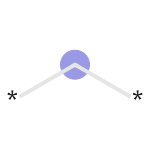

In [132]:
IPythonConsole.drawOptions.addAtomIndices = False 
mfp2_svg = Draw.DrawMorganBit(mol, 80, bit_info, useSVG=True)
mfp2_svg

While the above code can display 1 fingerprint fragment, it is more useful to display all fragments simultaneously:

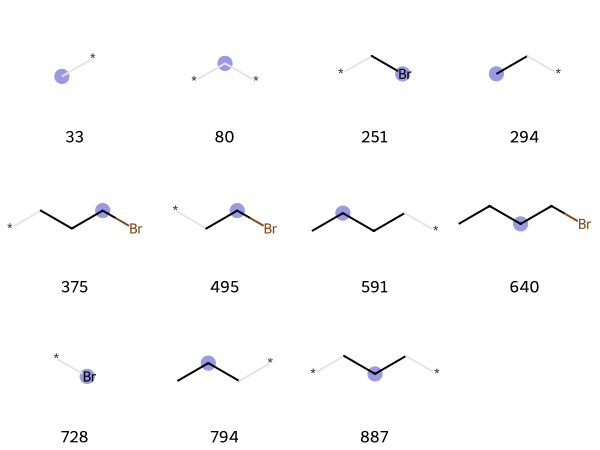

In [134]:
# Create a list of tuples for visualization
tpls = [(mol, bit_id, bit_info) for bit_id in fp1.GetOnBits()]
# Generate legends for each bit
legends = [str(bit_id) for bit_id in fp1.GetOnBits()]
# Visualize the bits
Draw.DrawMorganBits(tpls, molsPerRow=4, legends=legends)

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

* Which bit above represents the bromine with a radius of 0?
* Why do three carbons in 1-bromobutane result in an "on" bit for fragment 80?  
* If you changed 1-bromobutane to 1-chlorobutane, which fragments above (33, 80, 251, 294, 375, 495, 591, 640, 728, 794, 887) would you still expect to have a value of 1? (write this prediction down in the next cell for later)

In [142]:
# Write your prediction for which values would you still expect to have a value of 1 if you changed the molecule from 1-bromobutane to 1-chlorobutane



Let's compare the 1-bromobutane to 1-chlorobutane to determine if they have any fragments in common.

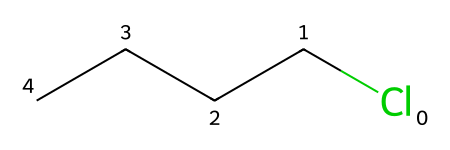

In [136]:
IPythonConsole.drawOptions.addAtomIndices = True 
mol = Chem.MolFromSmiles('ClCCCC')  # 1-chlorobutane
mol

In [137]:
# Step 1: Create the molecule from SMILES
mol = Chem.MolFromSmiles('ClCCCC')  # 1-chlorobutane

# Step 2: Initialize the Morgan fingerprint generator. We are setting the radius to 2 and total bit size to 1024
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)

# Step 3: Prepare the AdditionalOutput object to capture bit information
additional_output = rdFingerprintGenerator.AdditionalOutput()
additional_output.AllocateBitInfoMap()

# Step 4: Generate the fingerprint with additional output
fp2 = morgan_gen.GetFingerprint(mol, additionalOutput=additional_output)
print("The Morgan radius =2 fingerprint (ECFP4)for the molecule is:")
print(fp2.ToBitString())
print()

# Step 5: Retrieve and display the bit information

bit_info = additional_output.GetBitInfoMap()
for bit_id, atom_radius_list in bit_info.items():
    print(f"Bit {bit_id} is set by:")
    for atom_idx, radius in atom_radius_list:
        atom_symbol = mol.GetAtomWithIdx(atom_idx).GetSymbol()
        print(f"  - Atom index {atom_idx} ({atom_symbol}), Radius {radius}")


The Morgan radius =2 fingerprint (ECFP4)for the molecule is:
000000000000000000000000000000000100000000000000000000000000000000000000000000001000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000

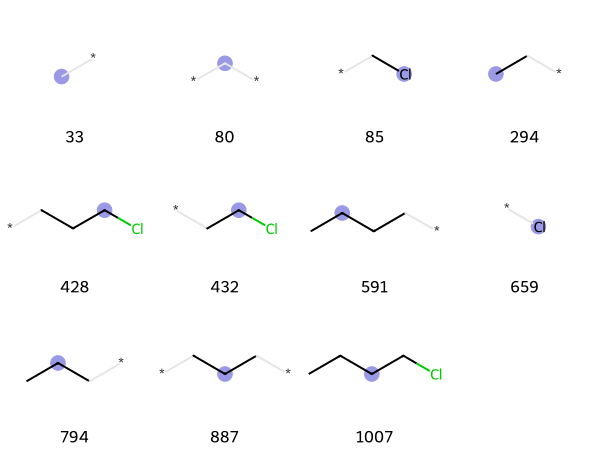

In [139]:
IPythonConsole.drawOptions.addAtomIndices = False 
# Create a list of tuples for visualization
tpls = [(mol, bit_id, bit_info) for bit_id in fp2.GetOnBits()]
# Generate legends for each bit
legends = [str(bit_id) for bit_id in fp2.GetOnBits()]
# Visualize the bits
Draw.DrawMorganBits(tpls, molsPerRow=4, legends=legends)

Now let's identify the bits it common of 1-bromobutane and 1-chlorobutane!

In [140]:
common_bits = set(fp1.GetOnBits()) & set(fp2.GetOnBits()) 
print(f"Common bits: {sorted(common_bits)}")

Common bits: [33, 80, 294, 591, 794, 887]


<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>
    
Did your prediction from the previous check your understanding hold true? If not, review the data to make sure you understand which fragments are on in both.



### 2: Path-Based Fingerprints

Path-based fingerprints are also hashed fingerprints.  They are generated by enumerating linear fragments of a given length and hashing them into a fixed-length bitstring.  An example is the RDKit's topological fingeprint.  As described in the RDK documentation (https://www.rdkit.org/docs/GettingStartedInPython.html#topological-fingerprints), while this fingerprint can be generated using FingerprintMols.FingerprintMol(), it is recommended to use rdmolops.RDKFingerprint() to generate the fingerprint using non-default parameter values.

The <a href ="https://www.rdkit.org/docs/source/rdkit.Chem.rdmolops.html#:~:text=rdkit.Chem.rdmolops.RDKFingerprint((Mol)mol">RDKFingerprint(mol) method</a> has a number of arguments that can be added:
* mol: the molecule to use
* fpSize: (optional) number of bits in the fingerprint Defaults to 2048.
* minPath: (optional) minimum number of bonds to include in the subgraphs Defaults to 1.
* maxPath: (optional) maximum number of bonds to include in the subgraphs Defaults to 7.

In [ ]:
# path based fingerprints
from rdkit.Chem import rdmolops
mol = Chem.MolFromSmiles("CCOC(=O)N1CCC(=C2C3=C(CCC4=C2N=CC=C4)C=C(C=C3)Cl)CC1")  # loratadine
fp = rdmolops.RDKFingerprint(mol, fpSize=2048, minPath=1, maxPath=7).ToBitString()
print(fp)

 <div class="alert alert-block alert-success">
      <H1><center>Homework</center></H1>

## Problem 1: MACCS Keys
For the list of terpene SMILES in the next code cell:
1) Display the structures
2) Generate the MACCS Keys for each molecule
3) Calculate number of "on" bits and "off" bits

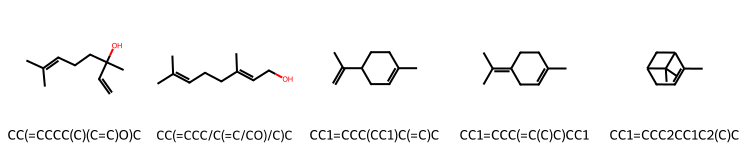

In [177]:
terpenes = ['CC(=CCCC(C)(C=C)O)C',                       #linalool
          'CC(=CCC/C(=C/CO)/C)C',                        #geraniol
          'CC1=CCC(CC1)C(=C)C',                          #limonene
          'CC1=CCC(=C(C)C)CC1',                          #terpinolene
          'CC1=CCC2CC1C2(C)C']                           #Alpha-pinene

# write your code here to display the molecules in Problem 1

from rdkit.Chem import Draw
mols = []
for x in terpenes:
    mols.append(Chem.MolFromSmiles(x))

Chem.Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(150,150), legends=[str(x) for x in terpenes] )

In [158]:
# write your code here to generate MACCS Keys and off/on bits in Problem 1

for terpene in terpenes:
    print(terpene)
    mol = Chem.MolFromSmiles(terpene)
    fp = MACCSkeys.GenMACCSKeys(mol)
    print(fp.ToBitString())
    print(fp.GetNumOnBits())   #get the total number bits with value 1
    print(fp.GetNumOffBits())  #get the total number bits with value 0
    print()

CC(=CCCC(C)(C=C)O)C
00000000000000000000000000000000001000000000000000100000000000000010000000101000000000000010000000010000100010001001101000000000000010000001010000010100100101001000100
23
144

CC(=CCC/C(=C/CO)/C)C
00000000000000000000000000000000000000000000000000100000000000000000000000101000001000000001000000010000000011000001101000000000110000000001010000010100010101001000100
22
145

CC1=CCC(CC1)C(=C)C
00000000000000000000000000000000001000000000000000100000000000000000000000001000000000000000000000010000000010000001101000000000110000000000000000010100000000001001010
15
152

CC1=CCC(=C(C)C)CC1
00000000000000000000000000000000000000000000000000100000000000000000000000101000000000000000000000010000000010000001101000000000110000000000010000010100000000001001010
16
151

CC1=CCC2CC1C2(C)C
00000000000100000000000000000000000000000000000000100000000000000010000000101000000000000000000000010000010000001000100000000000100000000000010001000100000000001001010
16
151



## Problem 2

For the list of PubChem compound ID numbers in the next code cell:
1) Use the use the PUG-REST API to obtain their SMILES and PubChem Fingerprints and store in lists
2) convert the PubChem Fingerprints to bitstrings and display
3) display their structures 


In [214]:
CIDS = [     4980,   # psilocin             
             1615,   # methylenedioxymethamphetamine
            10257,   # bufotenin
           360252,   # 5-bromo-DMT  
             4076,   # mescaline 
            98527,   # 2C-B
            5761 ]   # LSD 

# write your code here to obtain SMILES and PubChem Fingerprints 
import requests

#obtain Fingerprints
pcfp = []
for item in CIDS:
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/CID/"+ str(item)+ "/property/Fingerprint2D/TXT"
    res = requests.get(url)
    text = res.text.rstrip("\n")
    pcfp.append(text)

#obtain smiles
smiles = []
for item in CIDS:
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/CID/"+ str(item)+ "/property/canonicalSMILES/TXT"
    res = requests.get(url)
    text = res.text.rstrip("\n")
    smiles.append(text)
print(smiles)

['CN(C)CCC1=CNC2=C1C(=CC=C2)O', 'CC(CC1=CC2=C(C=C1)OCO2)NC', 'CN(C)CCC1=CNC2=C1C=C(C=C2)O', 'CN(C)CCC1=CNC2=C1C=C(C=C2)Br', 'COC1=CC(=CC(=C1OC)OC)CCN', 'COC1=CC(=C(C=C1CCN)OC)Br', 'CCN(CC)C(=O)C1CN(C2CC3=CNC4=CC=CC(=C34)C2=C1)C']


In [230]:
# write your code here to convert fingerprints from Base64 to bitstring

# b64 decoder user defined function
from base64 import b64decode
def PCFP_BitString(pcfp_base64) :

    pcfp_bitstring = "".join( ["{:08b}".format(x) for x in b64decode( pcfp_base64 )] )[32:913]
    return pcfp_bitstring

n=0
for item in pcfp:
    print('CID =', CIDS[n])
    print(item)
    pcfp_bitstring = PCFP_BitString(item)  # use the user defined function to convert the PubChem FingerPrint to a bitstring
    print(pcfp_bitstring)
    n =+1 
    print()

CID = 4980
AAADceBzIAAAAAAAAAAAAAAAAAAAAWAAAAAwAAAAAAAAAFgB8AAAHgAQCAAADAzBngQ+xvPJkgCgAzRnRACCgCAxIiAI2aA+bJgIJuLCkZOEcAhm0BnI2Aew0OMOgAAAAgAKAAAAAAAEABQAAAAAAAAAAA==
1110000001110011001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010110000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000101100000000001111100000000000000000000000111100000000000010000000010000000000000000000000011000000110011000001100111100000010000111110110001101111001111001001100100100000000010100000000000110011010001100111010001000000000010000010100000000010000000110001001000100010000000001000110110011010000000111110011011001001100000001000001001101110001011000010100100011001001110000100011100000000100001100110110100000001100111001000110110000000011110110000110100001110001100001110100000000000000000000000000000100000000000001010000000000000000000000000000000000000000000000100000000000001010000000000

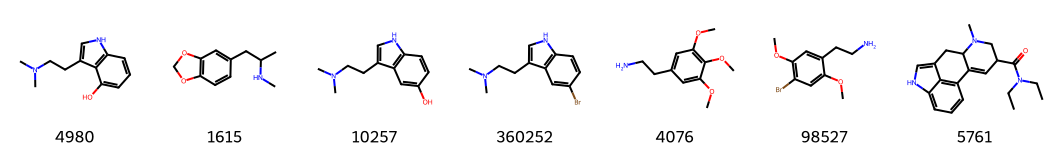

In [231]:
# write your code here to display structures
from rdkit.Chem import Draw
mols = []

for smile in smiles:

    mols.append(Chem.MolFromSmiles(smile))

Chem.Draw.MolsToGridImage(mols, molsPerRow=7, subImgSize=(150,150), legends=[str(x) for x in CIDS] )

In [235]:
# note this code was written with assistance from Chat-GPT
# rather than making separate requests for each CID and obtaining fingerprints and SMILES separately
# this program obtains both in one request

# Import necessary modules:
# - requests: to make HTTP requests to PubChem
# - csv: to parse the CSV-formatted response

import requests, csv

# StringIO allows us to treat a string like a file, which is required by csv.DictReader
from io import StringIO

# Initialize empty lists to store the results
fingerprints = []     # this will hold the PubChem 2D fingerprints (Base64 strings)
smiles_list   = []     # this will hold the canonical SMILES strings

# Convert the list of CIDs into a single comma-separated string
# (e.g., [4980, 1615] → "4980,1615")

cid_block = ",".join(map(str, CIDS))

# Construct the PUG REST URL to request both Fingerprint2D and CanonicalSMILES
# for multiple CIDs in CSV format
url = (
    "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/"
    f"{cid_block}/property/Fingerprint2D,CanonicalSMILES/CSV"
)

# Send the HTTP GET request to the PubChem server
res = requests.get(url)

# Raise an error if the request failed (e.g., network error or invalid CID)
res.raise_for_status()

# Parse the CSV response using csv.DictReader
# StringIO wraps the response text to make it look like a file
reader = csv.DictReader(StringIO(res.text))

# Loop through each row of the CSV (one row per compound)
for row in reader:
    fingerprints.append(row["Fingerprint2D"])
    smiles_list.append(row["CanonicalSMILES"])


CID = 4980
AAADceBzIAAAAAAAAAAAAAAAAAAAAWAAAAAwAAAAAAAAAFgB8AAAHgAQCAAADAzBngQ+xvPJkgCgAzRnRACCgCAxIiAI2aA+bJgIJuLCkZOEcAhm0BnI2Aew0OMOgAAAAgAKAAAAAAAEABQAAAAAAAAAAA==
1110000001110011001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010110000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000101100000000001111100000000000000000000000111100000000000010000000010000000000000000000000011000000110011000001100111100000010000111110110001101111001111001001100100100000000010100000000000110011010001100111010001000000000010000010100000000010000000110001001000100010000000001000110110011010000000111110011011001001100000001000001001101110001011000010100100011001001110000100011100000000100001100110110100000001100111001000110110000000011110110000110100001110001100001110100000000000000000000000000000100000000000001010000000000000000000000000000000000000000000000100000000000001010000000000

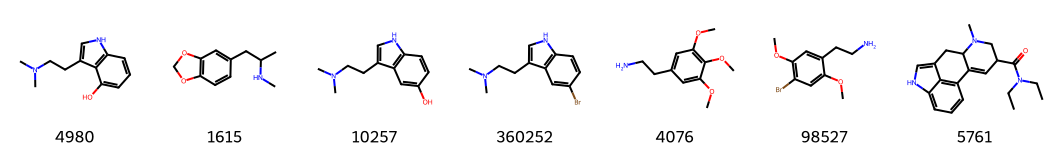

In [234]:
# b64 decoder user defined function
from base64 import b64decode
def PCFP_BitString(pcfp_base64) :

    pcfp_bitstring = "".join( ["{:08b}".format(x) for x in b64decode( pcfp_base64 )] )[32:913]
    return pcfp_bitstring

n=0
for item in fingerprints:
    print('CID =', CIDS[n])
    print(item)
    pcfp_bitstring = PCFP_BitString(item)  # use the user defined function to convert the PubChem FingerPrint to a bitstring
    print(pcfp_bitstring)
    n =+1 
    print()

mols = []
print(smiles_list)
for smile in smiles:
    mols.append(Chem.MolFromSmiles(smile))

Chem.Draw.MolsToGridImage(mols, molsPerRow=7, subImgSize=(150,150), legends=[str(x) for x in CIDS] )

### Problem 3
For the molecules below, generate the 512-bit-long Morgan Fingeprint comparable to the **FCFP6** fingerprint.

- Use the PUG REST API to search for the compounds by name and get their SMILES strings.
- Generate the molecular fingerprints from the SMILES strings.
- Print the generated fingerprints.


In [ ]:
synonyms = [ 'diphenhydramine', 'cetirizine', 'fexofenadine', 'loratadine' ]

In [ ]:
# Write your code in this cell

In [238]:
# instructor answer Problem 3
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

from rdkit.Chem import AllChem

import requests
import time
synonyms = [ 'diphenhydramine', 'cetirizine', 'fexofenadine', 'loratadine' ]
for synonym in synonyms :
    
    url = prolog + "/compound/name/" + synonym + "/property/isomericsmiles/TXT"
    res = requests.get(url)
    smiles_list = res.text.split()

    time.sleep(0.2)
    print(synonym)
    mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3,fpSize=512)
    for smiles in smiles_list :
        
        mol = Chem.MolFromSmiles(smiles)
        fp = mfpgen.GetFingerprint(mol)
        bitstring = fp.ToBitString()
        print("####", smiles)
        print(bitstring)
        print()

diphenhydramine
#### CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2
01000000000001000000000000000000010000000000010000000000000000001000000000100000100000000000000100000000000000000000000000000000000000000001100000000000000000000000000000000001000001010000000100000000000000000000001000000000010000000000000000000000000000000000000000010000001000000000000000000000000000100001000000001000000000000000000001000100000000000000100000100000010000000000000000000100000010000000000100010001000000000000000000000000000000000000000000000000000000000000000000000010000000000000100000000000

cetirizine
#### C1CN(CCN1CCOCC(=O)O)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl
01000000001001010000010000000000000000000100011001000000000100001000001000100000100000000001000000000000000000000000001001000000000000000010010000010000000000000000000000001001000000010000000100000000010000000000001010000000010010000000000001000000000100010001000000000000000000000001000000000001110000001000001000000100000000000000000001001100000000000000100000000